In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score



In [5]:
#importing the data and load dataset
mnist = fetch_openml('mnist_784', as_frame=False)

#label data
X, y = mnist.data, mnist.target



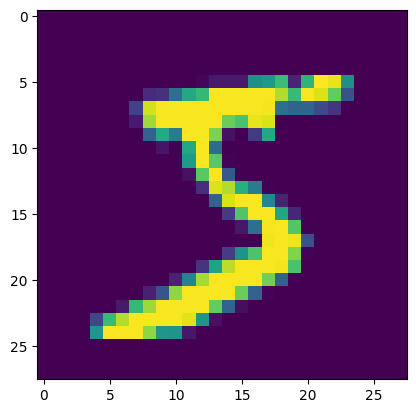

In [6]:
#checking and printing the values
plt.imshow(X[0].reshape(28, 28))

In [7]:
# Convert labels to binary
y = (y == '5')

#We are using whole dataset . split into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
kNeighborsClass = KNeighborsClassifier()
kNeighborsClass.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
#trained and checking it
y_pred = kNeighborsClass.predict(X_test)

False

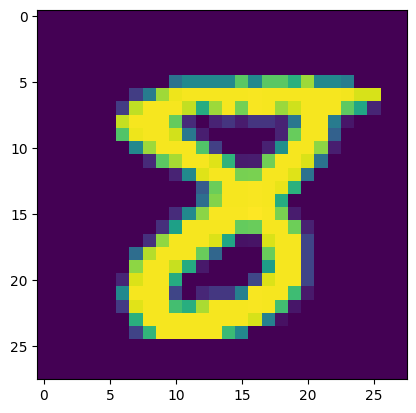

In [10]:
plt.imshow(X_test[0].reshape(28,28))
y_test[0]

In [11]:
#it says it is false or True;
pd.Series(y).value_counts()

False    63687
True      6313
dtype: int64

In [12]:
#Using kNeighbors default value 5 . and weights uniform and ignoring the Distance
p_grid = {
    'n_neighbors': [ 5],
    'weights': ['uniform']
}



In [13]:
#using grid we trained our model .
grid_search = GridSearchCV(kNeighborsClass,p_grid, cv=3,verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time=  51.4s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  43.6s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  43.3s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5], 'weights': ['uniform']},
             scoring='f1', verbose=2)

In [14]:

print("The Best F1 score ", grid_search.best_params_)

#Find the best grid
kNeighbors = grid_search.best_estimator_
y_pred = kNeighbors.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("F1 score on test set:", f1*100,"% ")

The Best F1 score  {'n_neighbors': 5, 'weights': 'uniform'}
F1 score on test set: 97.15415019762845 % 
